# Prepare the environment

# Part 1 - InfoHub Learning

### Learning Goals
When you complete the Part 1 - InfoHub Federated Learning, you should know how to:

- Query the events loaded.
- Query the objects loaded.

<div class="alert alert-block alert-info">This notebook is intended to be run by the app developer 
</div>

## Table of Contents

1. [Pre loaded Data](#load)<br>
2. [Prepare GraphQL Client to Query](#prepareGraphQLClient)<br>
3. [Query Business Object Events](#queryBusinessObjectEvents)<br>
4. [Query Business Objects](#queryBusinessObjects)<br>
5. [Summary](#summary)

<div class="alert alert-block alert-warning">Before you run this notebook,.....
</div>

In [1]:
!pip install python-graphql-client
!pip install PrettyTable

    100% |████████████████████████████████| 92kB 2.9MB/s ta 0:00:01
    100% |████████████████████████████████| 645kB 3.2MB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 3.6MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 3.0MB/s ta 0:00:01


<a id = "load"></a>
## 1. Pre loaded data

<a id = "1.1"></a>
### 1.1 The dataset required for this exercise is pre loaded.

As the app developer, you will be using the dataset that is already pre-loaded which is used to query the businessObjectEvents and businessObjects.

<a id = "prepareGraphQLClient"></a>
## 2. Prepare GraphQL Client to Query

In [2]:
#Create the variables and the GraphQL client
import json
import ast
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from python_graphql_client import GraphqlClient
from prettytable import PrettyTable


playground_tenant_id = "42107157-f993-441d-a289-6a8554ac6884"
playground_client_secret = "bI6cY1bO7qE2uL2yG7wS8lD7vN2dC6fN1aV0cY0aN7gJ4xL5rV"

url = "https://dev.api.ibm.com/infohub/bluedev/graph/na"
client = GraphqlClient(endpoint="https://dev.api.ibm.com/infohub/bluedev/graph/na", headers={
    "x-tenant-id": playground_tenant_id,
    "X-IBM-Client-Id": playground_tenant_id,
    "X-IBM-Client-Secret": playground_client_secret,
    "Content-Type": "application/json"
})

<a id = "queryBusinessObjectEvents"></a>
## 3. Query Business Object Events

As an application developer you often need to retrieve already persisted object data from the InfoHub, for use in your application. In this exercise you will learn how to issue a basic businessObjectEvent query to the query service's api and parse the data for consumption.



<a id = "3.1"></a>
### 3.1 Query Business Object Events

In [3]:
# Create the query string and variables required for the request.
query= """
    query ($tenantId: String!){
      businessObjectEvents(
        simpleFilter: {
          tenantId: $tenantId
          businessObjectEventCode: objectUpsertEvent
          businessObject:{
            tenantId: $tenantId
            type:Product
          }
        },
        cursorParams: {
          first: 2 #Max number of items to return
        }
      ){
        totalCount
        pageInfo {
          endCursor
          hasNextPage
        }
        edges {
          cursor
          object {
            eventCode
            infoHubObjectId
            objectType
            tenantId
            timestampEventOccurred
            timestampEventReceived
            eventDetails {
              ... on BusinessObjectEventDetails {
                businessObject{
                    id
                    type
                }
              }
            }
          }
        }
      }
    }
    }
"""
variables = {"tenantId": playground_tenant_id}
#print(variables)
# Synchronous request, returns dict
data = client.execute(query=query, variables=variables)
print("Results:")
print(json.dumps(data, indent=4, sort_keys=True))

Results:
{
    "data": {
        "businessObjectEvents": {
            "edges": [
                {
                    "cursor": "ZmZmZTdiZGYtODkwMy00MDRjLWI3ZjEtZDMyMjExOTYzNzNi",
                    "object": {
                        "eventCode": "objectUpsertEvent",
                        "eventDetails": {
                            "businessObject": {
                                "id": "9314844a-e9d7-476d-8361-04dc442839f2",
                                "type": "Product"
                            }
                        },
                        "infoHubObjectId": "9314844a-e9d7-476d-8361-04dc442839f2",
                        "objectType": "Product",
                        "tenantId": "42107157-f993-441d-a289-6a8554ac6884",
                        "timestampEventOccurred": "2021-03-11T00:48:53.043Z",
                        "timestampEventReceived": "2021-05-17T07:12:46.637Z"
                    }
                },
                {
                    "cursor": "

In [4]:
#Print the JSON in table format

mystr = """
{'tags': [{'name': 'Temperature1',
  'results': [{'attributes': {'Location': ['3rd Floor'],
  'Sensor-Serial-Number': ['PT100']},
  'groups': [{'name': 'type', 'type': 'number'}],
  'values': [[1460958592800, 24.2, 3],
  [1460958602800, 24.1, 1],
  [1460958612800, 23.9, 1],
  [1460958622800, 24.2, 1],
  [1460958632800, 24.5, 1],
  [1460958642800, 24.9, 1],
  [1460958652800, 24.6, 1],
  [1460958662800, 24.7, 1],
  [1460958672800, 24.7, 1]]}],
 'stats': {'rawCount': 9}}]}
"""
val = ast.literal_eval(mystr)
val1 = json.loads(json.dumps(val))
val2 = val1['tags'][0]['results'][0]['values']
print(pd.DataFrame(val2, columns=["time", "temperature", "quality"]))

            time  temperature  quality
0  1460958592800         24.2        3
1  1460958602800         24.1        1
2  1460958612800         23.9        1
3  1460958622800         24.2        1
4  1460958632800         24.5        1
5  1460958642800         24.9        1
6  1460958652800         24.6        1
7  1460958662800         24.7        1
8  1460958672800         24.7        1


In [5]:
# Create the query string and variables required for the request.
query= """
   query ($simpleFilter: BusinessObjectInput!, $advancedFilter: BooleanExp!, $cursorParams: CursorInput) {
          businessObjects(hint: {viewId: "inventoryflow"}, cursorParams: $cursorParams, simpleFilter: $simpleFilter, advancedFilter: $advancedFilter) {
            totalCount
            edges {
              object {
                id
                ... on Inventory {
                  quantity
                  quantityUpperThreshold
                  quantityLowerThreshold
                  product{
                    id
                    name
                  }
                  location{
                    id
                    locationName
                  }
                }
              }
            }
        }
    }
"""
variables = {
  "simpleFilter": {
    "type": "Inventory",
    "tenantId": playground_tenant_id
  },
  "cursorParams": {
    "first": 10
  },
  "advancedFilter": {
    "AND": [
      {
        "EQUALS": [
          {
            "SELECT": "product.id",
            "type": "STRING"
          },
          {
            "VALUE": "127c4898-eacd-414b-8988-3aee7537d7c2",
            "type": "STRING"
          }
        ]
      },
      {
        "EQUALS": [
          {
            "SELECT": "location.id",
            "type": "STRING"
          },
          {
            "VALUE": "6230549c-9cd1-4f9c-8da8-9e73372fa9bd",
            "type": "STRING"
          }
        ]
      },
      {
        "EQUALS": [
          {
            "SELECT": "class",
            "type": "STRING"
          },
          {
            "VALUE": "NEW",
            "type": "STRING"
          }
        ]
      },
      {
        "EQUALS": [
          {
            "SELECT": "segment",
            "type": "STRING"
          },
          {
            "VALUE": "UNSEGMENTED",
            "type": "STRING"
          }
        ]
      },
      {
        "EQUALS": [
          {
            "SELECT": "inventoryParentType",
            "type": "STRING"
          },
          {
            "VALUE": "ONHAND",
            "type": "STRING"
          }
        ]
      }
    ]
  }
}
#print(variables)

data = client.execute(query=query, variables=variables)
print("Results:")
print(json.dumps(data, indent=4, sort_keys=True))


Results:
{
    "data": {
        "businessObjects": {
            "edges": [
                {
                    "object": {
                        "id": "0cbd6cf5-3d9a-420e-9bc5-5ff7e7e584c7",
                        "location": {
                            "id": "6230549c-9cd1-4f9c-8da8-9e73372fa9bd",
                            "locationName": "Houston_PLT"
                        },
                        "product": {
                            "id": "127c4898-eacd-414b-8988-3aee7537d7c2",
                            "name": "Engine block"
                        },
                        "quantity": 140.0,
                        "quantityLowerThreshold": 75.0,
                        "quantityUpperThreshold": 250.0
                    }
                }
            ],
            "totalCount": 1
        }
    }
}


In [6]:
print("Querying locations")
# Create the query string and variables required for the request.
query= """
    query ($simpleFilter: BusinessObjectInput!, $advancedFilter: BooleanExp!, $aggregationParams: AggregationParams, $cursorParams: CursorInput) {
  businessObjects(advancedFilter: $advancedFilter, aggregationParams: $aggregationParams, simpleFilter: $simpleFilter, hint: {viewId: "locationflow"}, cursorParams: $cursorParams) {
    totalCount
    pageInfo {
      hasNextPage
    }
    edges {
      object {
        ... on Location {
          id
          locationName
          tenantId
          city
        }
      }
    }
  }
}
"""
variables = {
  "simpleFilter": {
    "type": "Location",
    "tenantId": playground_tenant_id
  },
  "cursorParams": {
    "first": 10
  },
  "advancedFilter": {
    "AND": [
      {
        "CONTAINS": [
          {
            "SELECT": "locationName",
            "type": "STRING"
          },
          {
            "VALUE": "Tropical Fruits",
            "type": "STRING"
          }
        ]
      }
    ]
  }
}
locationResponse = client.execute(query=query, variables=variables)
print("Results:")
print(json.dumps(locationResponse, indent=4, sort_keys=True))

#locations = []
#for edge in locationResponse['data']['businessObjects']['edges']:
# locations.append(edge['object']['locationName'])

#print(locations)

Querying locations
Results:
{
    "data": {
        "businessObjects": {
            "edges": [
                {
                    "object": {
                        "city": "Sao Paulo",
                        "id": "59eff04d-cab0-47f1-a4dc-69a34979ca42",
                        "locationName": "Tropical Fruits",
                        "tenantId": "42107157-f993-441d-a289-6a8554ac6884"
                    }
                }
            ],
            "pageInfo": {
                "hasNextPage": false
            },
            "totalCount": 1
        }
    }
}


In [7]:
#print("Querying SKU")
# Create the query string and variables required for the request.
query= """
    query ($simpleFilter: BusinessObjectInput!, $advancedFilter: BooleanExp!, $aggregationParams: AggregationParams, $cursorParams: CursorInput) {
  businessObjects(advancedFilter: $advancedFilter, aggregationParams: $aggregationParams, simpleFilter: $simpleFilter, hint: {viewId: "productflow"}, cursorParams: $cursorParams) {
    totalCount
    pageInfo {
      hasNextPage
    }
    edges {
      object {
        ... on Product {
          id
          name
          partNumber
          category {
            id
            code
            name
          }
        }
      }
    }
  }
}
"""
variables = {
  "simpleFilter": {
    "type": "Product",
    "tenantId": "42107157-f993-441d-a289-6a8554ac6884"
  },
  "cursorParams": {
    "first": 10
  },
  "advancedFilter": {
    "AND": [
      {
        "OR": [
          {
            "CONTAINS": [
              {
                "SELECT": "name",
                "type": "STRING"
              },
              {
                "VALUE": "a",
                "type": "STRING"
              }
            ]
          },
          {
            "CONTAINS": [
              {
                "SELECT": "partNumber",
                "type": "STRING"
              },
              {
                "VALUE": "AuroraPC-001",
                "type": "STRING"
              }
            ]
          }
        ]
      },
      {
        "EQUALS": [
          {
            "SELECT": "category.id",
            "type": "STRING"
          },
          {
            "VALUE": "6d116dc9-3b16-4efd-acdb-c6d78006bc26",
            "type": "STRING"
          }
        ]
      }
    ]
  }
}
productResponse = client.execute(query=query, variables=variables)
#print(json.dumps(productResponse, indent=4, sort_keys=True))

products = []
productIdName = {}
for edge in productResponse['data']['businessObjects']['edges']:
 products.append(edge['object']['name'])
 productIdName[edge['object']['name']]=edge['object']['id']

print("Products")
for product in products:
    print(product)

print ("\n")
    
print("Products: Id") 
print(json.dumps(productIdName, indent=4, sort_keys=True))
    
    

Products
ABS accumulators
High alloy pipes
Valve cover
Oil changer pan
Distribution panel
ABS accumulators
Automotive Fuses
Transfer switch
Performance Engine Long Block
Transmission


Products: Id
{
    "ABS accumulators": "1c422cec-9378-49d6-9b71-c91886d79088",
    "Automotive Fuses": "5d28256e-5ce5-44cb-9ad9-4efe897b67db",
    "Distribution panel": "ed1c9e10-8b15-40a8-965e-01aef12ec4a4",
    "High alloy pipes": "4ac9f454-63b8-4931-87e8-b291bece04bf",
    "Oil changer pan": "9faada2a-0a65-4047-bbec-ad31ad5c66f5",
    "Performance Engine Long Block": "fb2950b0-dd04-4bd3-bf7d-f5dec60bc690",
    "Transfer switch": "0ec0035b-dd28-46b7-a0f9-9ce1721acc7f",
    "Transmission": "f38cc589-aa75-492f-a369-9625ff20985c",
    "Valve cover": "b9e5b7bf-6050-468d-ad9c-a374b4bd7c68"
}


In [8]:
print("Aggregate the Supply Plan")
# Create the query string and variables required for the request.
query= """
    query ($simpleFilter: BusinessObjectInput!, $advancedFilter: BooleanExp!, $aggregationParams: AggregationParams, $cursorParams: CursorInput) {
  businessObjects(hint: {viewId: "supplyplanflow"}, cursorParams: $cursorParams, simpleFilter: $simpleFilter, advancedFilter: $advancedFilter, aggregationParams: $aggregationParams) {
    aggregationResultsTotalCount
    aggregationResults {
      dimensionValues {
        name
        value
      }
      values {
        name
        numValue
      }
    }
  }
}
"""
variables = {
    "simpleFilter": {
        "type": "SupplyPlan",
        "tenantId": "42107157-f993-441d-a289-6a8554ac6884"
    },
    "cursorParams": {
        "first": 0
    },
    "aggregationParams": {
        "dimension": {
            "fieldPath": "startDate",
            "type": "STRING",
            "calendarInterval": "1d"
        },
        "paginationParams": {
            "sort": {
                "fieldPath": "startDate",
                "order": "ASC"
            }
        },
        "reduce": {
            "expression": {
                "fieldPath": "quantity",
                "operator": "SUM",
                "type": "INT"
            },
            "output": {
                "resultAlias": "SupplyPlanQuantity",
                "type": "INT"
            }
        }
    },
    "advancedFilter": {
        "AND": [{
                "EQUALS_ANY": [{
                        "SELECT": "planParentType",
                        "type": "STRING"
                    }, {
                        "VALUES": [
                            "PLAN"
                        ],
                        "type": "STRING"
                    }
                ]
            }, {
                "GREATER_EQUALS": [{
                        "SELECT": "startDate",
                        "type": "STRING"
                    }, {
                        "VALUE": "2021-02-01T16:40:16+0000",
                        "type": "STRING"
                    }
                ]
            }, {
                "LESS_EQUALS": [{
                        "SELECT": "startDate",
                        "type": "STRING"
                    }, {
                        "VALUE": "2021-03-28T16:40:16+0000",
                        "type": "STRING"
                    }
                ]
            }, {
                "EQUALS": [{
                        "SELECT": "source",
                        "type": "STRING"
                    }, {
                        "VALUE": "IV",
                        "type": "STRING"
                    }
                ]
            }, {
                "EQUALS": [{
                        "SELECT": "product.id",
                        "type": "STRING"
                    }, {	
                        "VALUE": "c34ff86f-3711-420c-8335-352f068c1033",
                        "type": "STRING"
                    }
                ]
            }, {
                "EQUALS": [{
                        "SELECT": "location.id",
                        "type": "STRING"
                    }, {
                        "VALUE": "7adef438-0d6a-4bbc-a20c-57aee0470695",
                        "type": "STRING"
                    }
                ]
            }
        ]
    }
}
#print(variables)

supplyPlanResponse = client.execute(query=query, variables=variables)
#print(json.dumps(supplyPlanResponse, indent=4, sort_keys=True))

supplyplanQuantity = {}
for aggregationResult in supplyPlanResponse['data']['businessObjects']['aggregationResults']:
 supplyplanQuantity[aggregationResult['dimensionValues'][0]['value']] = aggregationResult['values'][0]['numValue']

#print(json.dumps(supplyplanQuantity, indent=4, sort_keys=True))

aggSupplyPlanTable = PrettyTable()
aggSupplyPlanTable.field_names = ["Start Date", "Sum(SupplyPlanQuantity)"]
for aggregationResult in supplyPlanResponse['data']['businessObjects']['aggregationResults']:
    aggSupplyPlanTable.add_row([aggregationResult['dimensionValues'][0]['value'],aggregationResult['values'][0]['numValue']])

print(aggSupplyPlanTable)

Aggregate the Supply Plan
+--------------------------+-------------------------+
|        Start Date        | Sum(SupplyPlanQuantity) |
+--------------------------+-------------------------+
| 2021-02-08T00:00:00.000Z |           0.0           |
| 2021-02-09T00:00:00.000Z |           0.0           |
| 2021-02-10T00:00:00.000Z |           0.0           |
| 2021-02-11T00:00:00.000Z |           0.0           |
| 2021-02-12T00:00:00.000Z |           0.0           |
| 2021-02-13T00:00:00.000Z |           0.0           |
| 2021-02-14T00:00:00.000Z |           0.0           |
| 2021-02-15T00:00:00.000Z |           0.0           |
| 2021-02-16T00:00:00.000Z |           0.0           |
| 2021-02-17T00:00:00.000Z |           0.0           |
| 2021-02-18T00:00:00.000Z |           0.0           |
| 2021-02-19T00:00:00.000Z |           0.0           |
| 2021-02-20T00:00:00.000Z |           0.0           |
| 2021-02-21T00:00:00.000Z |           0.0           |
| 2021-02-22T00:00:00.000Z |           

In [13]:
print("Aggregating Demand Plan Quantity")
# Create the query string and variables required for the request.
query= """
    query ($simpleFilter: BusinessObjectInput!, $advancedFilter: BooleanExp!, $aggregationParams: AggregationParams, $cursorParams: CursorInput) {
  businessObjects(hint: {viewId: "demandplanflow"}, cursorParams: $cursorParams, simpleFilter: $simpleFilter, advancedFilter: $advancedFilter, aggregationParams: $aggregationParams) {
    aggregationResultsTotalCount
    aggregationResults {
      dimensionValues {
        name
        value
      }
      values {
        name
        numValue
      }
    }
  }
}

"""
variables = {
    "simpleFilter": {
        "type": "DemandPlan",
        "tenantId": "42107157-f993-441d-a289-6a8554ac6884"
    },
    "cursorParams": {
        "first": 0
    },
    "aggregationParams": {
        "dimension": {
            "fieldPath": "startDate",
            "type": "STRING",
            "calendarInterval": "1d"
        },
        "paginationParams": {
            "sort": {
                "fieldPath": "startDate",
                "order": "ASC"
            }
        },
        "reduce": {
            "expression": {
                "fieldPath": "quantity",
                "operator": "SUM",
                "type": "INT"
            },
            "output": {
                "resultAlias": "DemandPlanQuantity",
                "type": "INT"
            }
        }
    },
    "advancedFilter": {
        "AND": [{
                "EQUALS_ANY": [{
                        "SELECT": "planParentType",
                        "type": "STRING"
                    }, {
                        "VALUES": [
                            "PLAN"
                        ],
                        "type": "STRING"
                    }
                ]
            }, {
                "GREATER_EQUALS": [{
                        "SELECT": "startDate",
                        "type": "STRING"
                    }, {
                        "VALUE": "2021-02-01T16:40:16+0000",
                        "type": "STRING"
                    }
                ]
            }, {
                "LESS_EQUALS": [{
                        "SELECT": "startDate",
                        "type": "STRING"
                    }, {
                        "VALUE": "2021-03-28T16:40:16+0000",
                        "type": "STRING"
                    }
                ]
            }, {
                "EQUALS": [{
                        "SELECT": "source",
                        "type": "STRING"
                    }, {
                        "VALUE": "IV",
                        "type": "STRING"
                    }
                ]
            }, {
                "EQUALS": [{
                        "SELECT": "product.id",
                        "type": "STRING"
                    }, {	
                        "VALUE": "b9a74922-f389-49c3-a916-004a79eeb146",
                        "type": "STRING"
                    }
                ]
            }, {
                "EQUALS": [{
                        "SELECT": "location.id",
                        "type": "STRING"
                    }, {
                        "VALUE": "0b55f0f1-d874-420a-ba60-57b07cd7522a",
                        "type": "STRING"
                    }
                ]
            }
        ]
    }
}
#print(variables)

demandPlanResponse = client.execute(query=query, variables=variables)
#print(json.dumps(demandPlanResponse, indent=4, sort_keys=True))

demandplanQuantity = {}
for aggregationResult in supplyPlanResponse['data']['businessObjects']['aggregationResults']:
 demandplanQuantity[aggregationResult['dimensionValues'][0]['value']] = aggregationResult['values'][0]['numValue']


aggDemandPlanTable = PrettyTable()
aggDemandPlanTable.field_names = ["Start Date", "Sum(DemandPlanQuantity)"]
for aggregationResult in supplyPlanResponse['data']['businessObjects']['aggregationResults']:
    aggDemandPlanTable.add_row([aggregationResult['dimensionValues'][0]['value'],aggregationResult['values'][0]['numValue']])

print(aggDemandPlanTable)

Aggregating Demand Plan Quantity
+--------------------------+-------------------------+
|        Start Date        | Sum(DemandPlanQuantity) |
+--------------------------+-------------------------+
| 2021-02-08T00:00:00.000Z |           0.0           |
| 2021-02-09T00:00:00.000Z |           0.0           |
| 2021-02-10T00:00:00.000Z |           0.0           |
| 2021-02-11T00:00:00.000Z |           0.0           |
| 2021-02-12T00:00:00.000Z |           0.0           |
| 2021-02-13T00:00:00.000Z |           0.0           |
| 2021-02-14T00:00:00.000Z |           0.0           |
| 2021-02-15T00:00:00.000Z |           0.0           |
| 2021-02-16T00:00:00.000Z |           0.0           |
| 2021-02-17T00:00:00.000Z |           0.0           |
| 2021-02-18T00:00:00.000Z |           0.0           |
| 2021-02-19T00:00:00.000Z |           0.0           |
| 2021-02-20T00:00:00.000Z |           0.0           |
| 2021-02-21T00:00:00.000Z |           0.0           |
| 2021-02-22T00:00:00.000Z |    

In [14]:
#Is this not a duplicate
print("Querying On Order Plan")
# Create the query string and variables required for the request.
query= """
    query ($simpleFilter: BusinessObjectInput!, $advancedFilter: BooleanExp!, $aggregationParams: AggregationParams, $cursorParams: CursorInput) {
  businessObjects(hint: {viewId: "supplyplanflow"}, cursorParams: $cursorParams, simpleFilter: $simpleFilter, advancedFilter: $advancedFilter, aggregationParams: $aggregationParams) {
    aggregationResultsTotalCount
    aggregationResults {
      dimensionValues {
        name
        value
      }
      values {
        name
        numValue
      }
    }
  }
}
"""
variables = {
    "simpleFilter": {
        "type": "SupplyPlan",
        "tenantId": "42107157-f993-441d-a289-6a8554ac6884"
    },
    "cursorParams": {
        "first": 0
    },
    "aggregationParams": {
        "dimension": {
            "fieldPath": "startDate",
            "type": "STRING",
            "calendarInterval": "1d"
        },
        "paginationParams": {
            "sort": {
                "fieldPath": "startDate",
                "order": "ASC"
            }
        },
        "reduce": {
            "expression": {
                "fieldPath": "quantity",
                "operator": "SUM",
                "type": "INT"
            },
            "output": {
                "resultAlias": "SupplyPlanQuantity",
                "type": "INT"
            }
        }
    },
    "advancedFilter": {
        "AND": [{
                "EQUALS_ANY": [{
                        "SELECT": "planParentType",
                        "type": "STRING"
                    }, {
                        "VALUES": [
                            "PO_PLACED",
                            "PO_SCHEDULED",
                            "PO_RELEASED"
                        ],
                        "type": "STRING"
                    }
                ]
            }, {
                "GREATER_EQUALS": [{
                        "SELECT": "startDate",
                        "type": "STRING"
                    }, {
                        "VALUE": "2021-02-01T16:40:16+0000",
                        "type": "STRING"
                    }
                ]
            }, {
                "LESS_EQUALS": [{
                        "SELECT": "startDate",
                        "type": "STRING"
                    }, {
                        "VALUE": "2021-03-28T16:40:16+0000",
                        "type": "STRING"
                    }
                ]
            }, {
                "EQUALS": [{
                        "SELECT": "source",
                        "type": "STRING"
                    }, {
                        "VALUE": "IV",
                        "type": "STRING"
                    }
                ]
            }, {
                "EQUALS": [{
                        "SELECT": "product.id",
                        "type": "STRING"
                    }, {	
                        "VALUE": "c34ff86f-3711-420c-8335-352f068c1033",
                        "type": "STRING"
                    }
                ]
            }, {
                "EQUALS": [{
                        "SELECT": "location.id",
                        "type": "STRING"
                    }, {
                        "VALUE": "7adef438-0d6a-4bbc-a20c-57aee0470695",
                        "type": "STRING"
                    }
                ]
            }
        ]
    }
}
#print(variables)

onOrderResponse = client.execute(query=query, variables=variables)
#print(json.dumps(onOrderResponse, indent=4, sort_keys=True))

onOrderQuantity = {}
for aggregationResult in supplyPlanResponse['data']['businessObjects']['aggregationResults']:
 onOrderQuantity[aggregationResult['dimensionValues'][0]['value']] = aggregationResult['values'][0]['numValue']


aggOrderPlanTable = PrettyTable()
aggOrderPlanTable.field_names = ["Start Date", "Sum(SupplyPlanQuantity)"]
for aggregationResult in onOrderResponse['data']['businessObjects']['aggregationResults']:
    aggOrderPlanTable.add_row([aggregationResult['dimensionValues'][0]['value'],aggregationResult['values'][0]['numValue']])

print(aggOrderPlanTable)

Querying On Order Plan
+--------------------------+-------------------------+
|        Start Date        | Sum(SupplyPlanQuantity) |
+--------------------------+-------------------------+
| 2021-02-24T00:00:00.000Z |          200.0          |
| 2021-02-25T00:00:00.000Z |           0.0           |
| 2021-02-26T00:00:00.000Z |           0.0           |
| 2021-02-27T00:00:00.000Z |           0.0           |
| 2021-02-28T00:00:00.000Z |           0.0           |
| 2021-03-01T00:00:00.000Z |           0.0           |
| 2021-03-02T00:00:00.000Z |           0.0           |
| 2021-03-03T00:00:00.000Z |           0.0           |
| 2021-03-04T00:00:00.000Z |          200.0          |
| 2021-03-05T00:00:00.000Z |           0.0           |
| 2021-03-06T00:00:00.000Z |           0.0           |
| 2021-03-07T00:00:00.000Z |           0.0           |
| 2021-03-08T00:00:00.000Z |           0.0           |
| 2021-03-09T00:00:00.000Z |           0.0           |
| 2021-03-10T00:00:00.000Z |           0.0

In [15]:
print("Querying Sales Order")
# Create the query string and variables required for the request.
query= """
    query ($simpleFilter: BusinessObjectInput!, $advancedFilter: BooleanExp!, $aggregationParams: AggregationParams, $cursorParams: CursorInput) {
  businessObjects(hint: {viewId: "demandplanflow"}, cursorParams: $cursorParams, simpleFilter: $simpleFilter, advancedFilter: $advancedFilter, aggregationParams: $aggregationParams) {
    aggregationResultsTotalCount
    aggregationResults {
      dimensionValues {
        name
        value
      }
      values {
        name
        numValue
      }
    }
  }
}

"""
variables = {
    "simpleFilter": {
        "type": "DemandPlan",
        "tenantId": playground_tenant_id
    },
    "cursorParams": {
        "first": 0
    },
    "aggregationParams": {
        "dimension": {
            "fieldPath": "startDate",
            "type": "STRING",
            "calendarInterval": "1d"
        },
        "paginationParams": {
            "sort": {
                "fieldPath": "startDate",
                "order": "ASC"
            }
        },
        "reduce": {
            "expression": {
                "fieldPath": "quantity",
                "operator": "SUM",
                "type": "INT"
            },
            "output": {
                "resultAlias": "DemandPlanQuantity",
                "type": "INT"
            }
        }
    },
    "advancedFilter": {
        "AND": [{
                "EQUALS_ANY": [{
                        "SELECT": "planParentType",
                        "type": "STRING"
                    }, {
                        "VALUES": [
                            "SCHEDULED",
               "ALLOCATED",
                "OPEN_ORDER",
                "RSRV_ORDER",
                "BACKORDER"
                        ],
                        "type": "STRING"
                    }
                ]
            }, {
                "GREATER_EQUALS": [{
                        "SELECT": "startDate",
                        "type": "STRING"
                    }, {
                        "VALUE": "2021-02-01T16:40:16+0000",
                        "type": "STRING"
                    }
                ]
            }, {
                "LESS_EQUALS": [{
                        "SELECT": "startDate",
                        "type": "STRING"
                    }, {
                        "VALUE": "2021-03-28T16:40:16+0000",
                        "type": "STRING"
                    }
                ]
            }, {
                "EQUALS": [{
                        "SELECT": "source",
                        "type": "STRING"
                    }, {
                        "VALUE": "IV",
                        "type": "STRING"
                    }
                ]
            }, {
                "EQUALS": [{
                        "SELECT": "product.id",
                        "type": "STRING"
                    }, {	
                        "VALUE": "b9a74922-f389-49c3-a916-004a79eeb146",
                        "type": "STRING"
                    }
                ]
            }, {
                "EQUALS": [{
                        "SELECT": "location.id",
                        "type": "STRING"
                    }, {
                        "VALUE": "0b55f0f1-d874-420a-ba60-57b07cd7522a",
                        "type": "STRING"
                    }
                ]
            }
        ]
    }
}
#print(variables)
#????? Why does this return NULL results
salesOrderResponse = client.execute(query=query, variables=variables)
salesOrderResponse='{"data":{"businessObjects":{"aggregationResultsTotalCount":22,"aggregationResults":[{"dimensionValues":[{"name":"startDate","value":"2021-03-05T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":50}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-06T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":50}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-07T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":50}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-08T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":0}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-09T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":0}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-10T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":0}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-11T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":50}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-12T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":0}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-13T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":50}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-14T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":50}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-15T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":0}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-16T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":0}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-17T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":50}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-18T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":0}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-19T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":50}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-20T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":0}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-21T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":0}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-22T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":0}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-23T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":50}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-24T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":0}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-25T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":0}]},{"dimensionValues":[{"name":"startDate","value":"2021-03-26T00:00:00.000Z"}],"values":[{"name":"DemandPlanQuantity.sum","numValue":50}]}]}}}'
#print(json.dumps(onOrderResponse, indent=4, sort_keys=True))

salesOrderQuantity = {}
for aggregationResult in supplyPlanResponse['data']['businessObjects']['aggregationResults']:
 salesOrderQuantity[aggregationResult['dimensionValues'][0]['value']] = aggregationResult['values'][0]['numValue']


aggTable = PrettyTable()
aggTable.field_names = ["Start Date", "Sum(SupplyPlanQuantity)"]
for aggregationResult in onOrderResponse['data']['businessObjects']['aggregationResults']:
    aggTable.add_row([aggregationResult['dimensionValues'][0]['value'],aggregationResult['values'][0]['numValue']])

print(aggTable)


Querying Sales Order
+--------------------------+-------------------------+
|        Start Date        | Sum(SupplyPlanQuantity) |
+--------------------------+-------------------------+
| 2021-02-24T00:00:00.000Z |          200.0          |
| 2021-02-25T00:00:00.000Z |           0.0           |
| 2021-02-26T00:00:00.000Z |           0.0           |
| 2021-02-27T00:00:00.000Z |           0.0           |
| 2021-02-28T00:00:00.000Z |           0.0           |
| 2021-03-01T00:00:00.000Z |           0.0           |
| 2021-03-02T00:00:00.000Z |           0.0           |
| 2021-03-03T00:00:00.000Z |           0.0           |
| 2021-03-04T00:00:00.000Z |          200.0          |
| 2021-03-05T00:00:00.000Z |           0.0           |
| 2021-03-06T00:00:00.000Z |           0.0           |
| 2021-03-07T00:00:00.000Z |           0.0           |
| 2021-03-08T00:00:00.000Z |           0.0           |
| 2021-03-09T00:00:00.000Z |           0.0           |
| 2021-03-10T00:00:00.000Z |           0.0  

In [16]:
#supplyplanQuantity = ???
#demandplanQuantity = ???

aggTable

supplyPlanDf = pd.DataFrame(supplyplanQuantity, index=[0])
demandPlanDf = pd.DataFrame(demandplanQuantity, index=[0])
onOrderDf = pd.DataFrame(onOrderQuantity, index=[0])
salesOrderDf = pd.DataFrame(salesOrderQuantity, index=[0])
  
combinedDF = pd.DataFrame({'supplyPlan':pd.Series(supplyplanQuantity),'demandPlan':pd.Series(demandplanQuantity),'onOrder':pd.Series(onOrderQuantity),'Salesorder':pd.Series(salesOrderQuantity)})
#combinedDF = pd.DataFrame({'supplyPlan':pd.Series(supplyplanQuantity),'demandPlan':pd.Series(demandplanQuantity)})
combinedDF['QuantityLowerThreshold'] = 10
combinedDF['QuantityUpperThreshold'] = 40

print(combinedDF)

                          supplyPlan  demandPlan  onOrder  Salesorder  \
2021-02-08T00:00:00.000Z         0.0         0.0      0.0         0.0   
2021-02-09T00:00:00.000Z         0.0         0.0      0.0         0.0   
2021-02-10T00:00:00.000Z         0.0         0.0      0.0         0.0   
2021-02-11T00:00:00.000Z         0.0         0.0      0.0         0.0   
2021-02-12T00:00:00.000Z         0.0         0.0      0.0         0.0   
2021-02-13T00:00:00.000Z         0.0         0.0      0.0         0.0   
2021-02-14T00:00:00.000Z         0.0         0.0      0.0         0.0   
2021-02-15T00:00:00.000Z         0.0         0.0      0.0         0.0   
2021-02-16T00:00:00.000Z         0.0         0.0      0.0         0.0   
2021-02-17T00:00:00.000Z         0.0         0.0      0.0         0.0   
2021-02-18T00:00:00.000Z         0.0         0.0      0.0         0.0   
2021-02-19T00:00:00.000Z         0.0         0.0      0.0         0.0   
2021-02-20T00:00:00.000Z         0.0         0.0   

In [17]:
N, K = combinedDF.shape
data = {
        "value": combinedDF.to_numpy().ravel("F"),
        "variable": np.asarray(combinedDF.columns).repeat(N),
        "date": np.tile(np.asarray(combinedDF.index), K),
}

combinedPivotDF = pd.DataFrame(data, columns=["date", "variable", "value"])

print(combinedPivotDF.pivot(index="variable", columns="date", values="value"))

date                    2021-02-08T00:00:00.000Z  2021-02-09T00:00:00.000Z  \
variable                                                                     
QuantityLowerThreshold                      10.0                      10.0   
QuantityUpperThreshold                      40.0                      40.0   
Salesorder                                   0.0                       0.0   
demandPlan                                   0.0                       0.0   
onOrder                                      0.0                       0.0   
supplyPlan                                   0.0                       0.0   

date                    2021-02-10T00:00:00.000Z  2021-02-11T00:00:00.000Z  \
variable                                                                     
QuantityLowerThreshold                      10.0                      10.0   
QuantityUpperThreshold                      40.0                      40.0   
Salesorder                                   0.0               

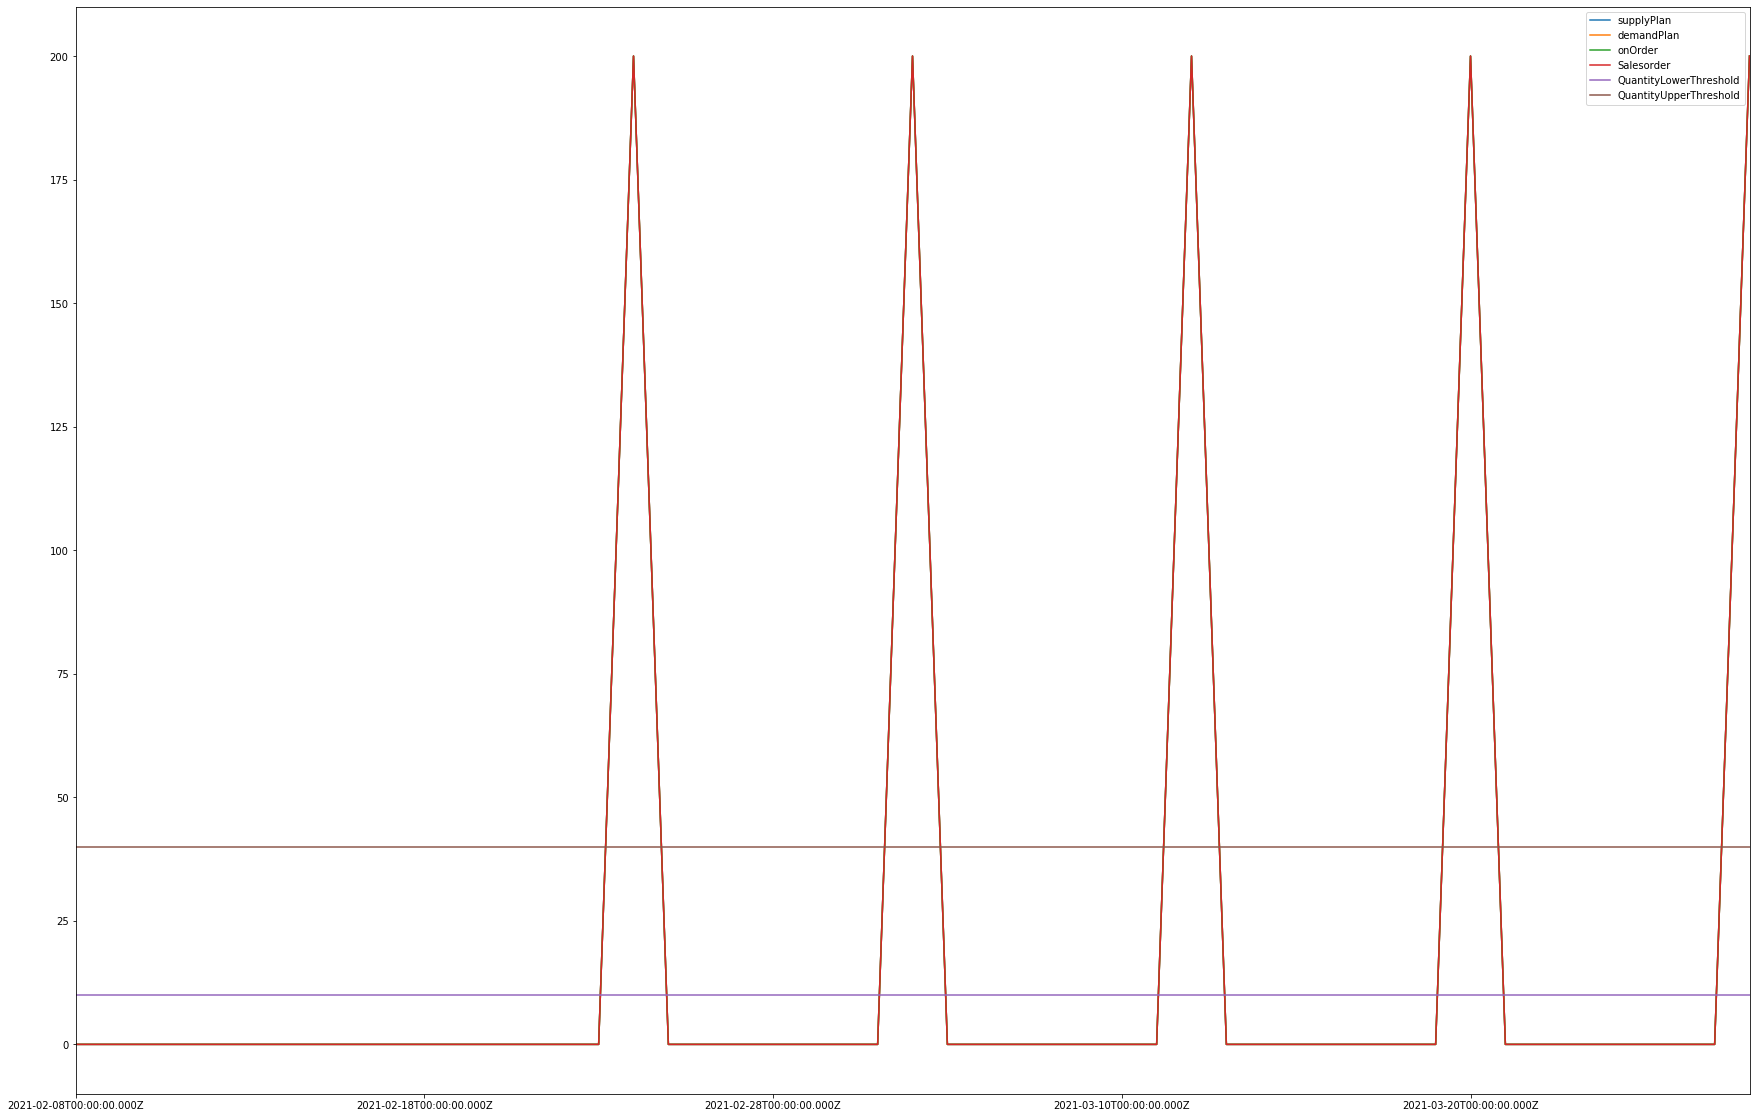

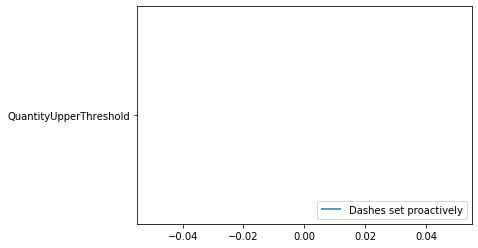

In [18]:

ax = combinedDF.plot(figsize=(30,20))


fig, ax = plt.subplots()


line2 = ax.plot("QuantityUpperThreshold", dashes=[30, 5, 10, 5],
                 label='Dashes set proactively')


ax.legend(loc='lower right')
plt.show()

#combinedDF.plot(y=["supplyPlan", "demandPlan","QuantityLowerThreshold","QuantityUpperThreshold"], figsize=(40,20));
